Eficiencia terminal y mujeres en ingeniería
===========================================

Objetivo
--------
Explorar la relación entre el porcentaje de eficiencia terminal por estado y ciclo escolar, con respecto al porcentaje de mujeres inscritas a una carre de ingeniería. Hacer una análisis gráfico del comportamiento de los estados en los diferentes ciclos escolares.

Datos
-----
Los datos analizados provienen de la SEP, estos corresponden al conjunto de indicadores objetivos de desarrollo sustentable. Para conocer más al respecto o extraer más datos relacionados se pueden descargar desde la página siguiente:
  * http://catalogo.datos.gob.mx/dataset/indicadores-objetivos-de-desarrollo-sustentable
  

In [47]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
pd.set_option('display.mpl_style','default')
plt.rcParams['figure.figsize']=(20,7)
import sys
reload(sys)  
sys.setdefaultencoding('utf8')

In [2]:
Mujeres=pd.read_csv('~/Documentos/Tutorial-Python/Datos/Mujeres_ingeniería_y_tecnología.csv')

In [3]:
Eficiencia=pd.read_csv('~/Documentos/Tutorial-Python/Datos/Eficiencia_terminal_en_educación_terciaria.csv')

In [4]:
Mujeres.head()

,ENTIDAD,CICLO,MUJERES_INSC_ING,MAT_TOTAL_SUP,%_MUJERES_EN_ING
0,01 Aguascalientes,2010/2011,3842,35198,10.915393
1,02 Baja California,2010/2011,6614,78503,8.425156
2,03 Baja California Sur,2010/2011,1217,15503,7.850094
3,04 Campeche,2010/2011,2262,23275,9.718582
4,05 Coahuila,2010/2011,8776,74490,11.781447


In [5]:
Eficiencia.head()

,ENTIDAD,CICLO,EGRTn,NI1Gn-4,Etsup
0,01 Aguascalientes,2010/2011,5878,8687,67.664326
1,02 Baja California,2010/2011,10862,13834,78.516698
2,03 Baja California Sur,2010/2011,2218,3977,55.770681
3,04 Campeche,2010/2011,4065,6333,64.187589
4,05 Coahuila,2010/2011,13685,18387,74.427585


In [6]:
Mujeres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
ENTIDAD             160 non-null object
CICLO               160 non-null object
MUJERES_INSC_ING    160 non-null int64
MAT_TOTAL_SUP       160 non-null int64
%_MUJERES_EN_ING    160 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.3+ KB


In [7]:
Eficiencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
ENTIDAD    128 non-null object
CICLO      128 non-null object
EGRTn      128 non-null int64
NI1Gn-4    128 non-null int64
Etsup      128 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.1+ KB


Se observa que tienen el mismo tipo de datos y lo único que falta revisar es la cantidad de periodos, ya que se observa en la información de cada tabla que la de Mujeres cuanta con 168 líneas y las de Eficiencia solo 128. Reviso los ciclos que se consideran en los datos.

In [8]:
Mujeres.CICLO.drop_duplicates()

0      2010/2011
32     2011/2012
64     2012/2013
96     2013/2014
128    2014/2015
Name: CICLO, dtype: object

Se observa que desde la fila 128 inician los registros del ciclo 2014/2015, entonces solo eligo de la tabla de mujeres las filas relacionadas con los ciclos 2010/2011, 2011/2012, 2012/2013 y 2013/2014.

In [9]:
Mujeres[Mujeres.CICLO!='2014/2015'][['ENTIDAD','CICLO','%_MUJERES_EN_ING']].shape

(128, 3)

In [6]:
#Se construye otra tabla solo con las filas 
Tabla=Mujeres[Mujeres.CICLO!='2014/2015'][['ENTIDAD','CICLO','%_MUJERES_EN_ING']]

Al nuevo DataFrame se le agrega una columna nueva, la finalidad es concentrar los datos en una sola tabla.

In [7]:
#Se agrega una nueva columna a los datos
Tabla['Etsup']=Eficiencia.Etsup

In [8]:
#Se visualizan los primeros registros del DataFrame
Tabla.head()

,ENTIDAD,CICLO,%_MUJERES_EN_ING,Etsup
0,01 Aguascalientes,2010/2011,10.915393,67.664326
1,02 Baja California,2010/2011,8.425156,78.516698
2,03 Baja California Sur,2010/2011,7.850094,55.770681
3,04 Campeche,2010/2011,9.718582,64.187589
4,05 Coahuila,2010/2011,11.781447,74.427585


In [24]:
#Se agrupan los datos y tomo las medianas de los dos porcentajes, tanto el de inscripción de mujeres a ingeniería
#como el porcentaje de eficiencia teminal.
Tabla.groupby('CICLO').median()

,%_MUJERES_EN_ING,Etsup
CICLO,,
2010/2011,9.705547,71.239509
2011/2012,6.806313,68.222179
2012/2013,7.035354,71.630243
2013/2014,7.340921,70.287710


Para tener una "idea" visual de lo que está pasando con los datos o como se comportan, hago una gráfica de barras con respecto a los años.

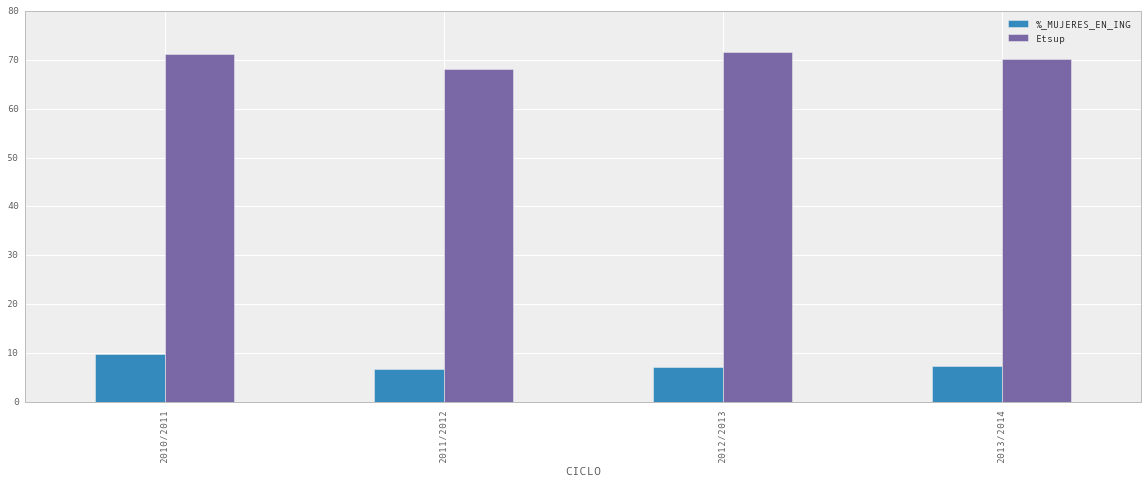

In [14]:
#Gráfica de barras
Tabla.groupby('CICLO').median().plot(kind='bar')

Se precia bruscamente que el porcentaje relacionado con la inscripción de mujeres a ingeniería es muy bajo, es entendible debido a que se busca que la tasa de eficiencia terminar sea muy cercana siempre a 100%. Si se hace esto por estado o entidad federativa, se observará algo "similar".

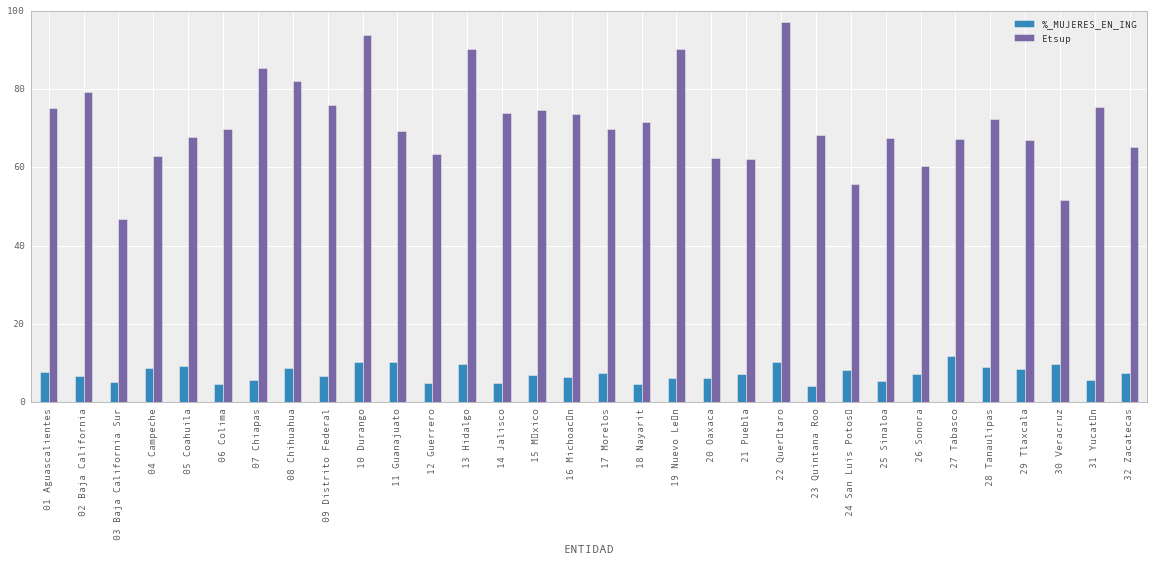

In [15]:
Tabla.groupby('ENTIDAD').median().plot(kind='bar')

Para tratar de revisar la "posible" relación entre las dos tasas de porcentaje hago el ejercicio de "normalizar" los valores, estos es "centrar" los datos y "dividir" por la desviación estándar. No explico los detalles técnicas, solo hago esto para poder tener un marco comparativo entre las dos tasas. 

**Nota**: Lo que hago es un análisis ilustrativo, por lo cual no entro en detalles estadísticos serios. No es la finalidad de esta exploración.

In [9]:
#Cambio el nombre a las columnas, para quitarle el caracter '%' a la tasa de mujeres inscritas en ingeniería.
Tabla.columns=['ENTIDAD','CICLO','P_MUJERES_EN_ING','Etsup']

In [10]:
#Normalizo los datos y los agrego a una nueva columna en el DataFrame.
Tabla['Z_MUJERES_ING']=(Tabla.P_MUJERES_EN_ING-Tabla.P_MUJERES_EN_ING.mean())/(Tabla.P_MUJERES_EN_ING.std())

In [11]:
#Normalizo los datos de eficiencia terminal y los agrego a una nueva columna.
Tabla['Z_Etsup']=(Tabla.Etsup-Tabla.Etsup.mean())/Tabla.Etsup.std()

In [12]:
Tabla.head()

,ENTIDAD,CICLO,P_MUJERES_EN_ING,Etsup,Z_MUJERES_ING,Z_Etsup
0,01 Aguascalientes,2010/2011,10.915393,67.664326,1.369299,-0.316352
1,02 Baja California,2010/2011,8.425156,78.516698,0.272798,0.575899
2,03 Baja California Sur,2010/2011,7.850094,55.770681,0.019587,-1.294212
3,04 Campeche,2010/2011,9.718582,64.187589,0.842320,-0.602199
4,05 Coahuila,2010/2011,11.781447,74.427585,1.750640,0.239704


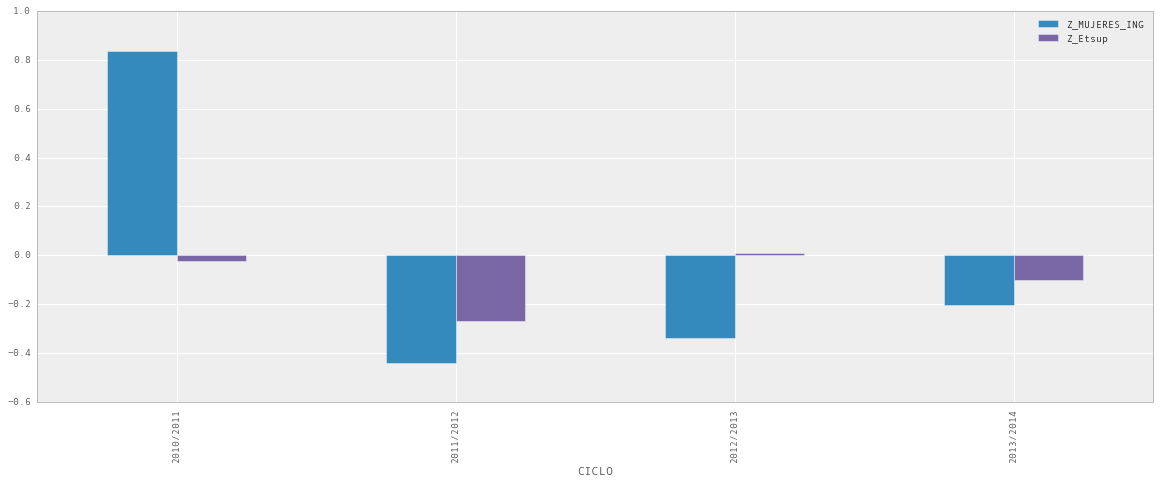

In [20]:
#Hago una visualización de las variables o columnas normalizadas.
Tabla.groupby('CICLO')[['Z_MUJERES_ING','Z_Etsup']].median().plot(kind='bar')

La gráfica anterior deja ver algo curioso, que ven valores negativos en la mediana para casi todos los años. Lo cual pues si bien, no es nada malo debido a que se "normalizaron" los datos, pero creo que viendo un histograma de los valores de las dos columnas puede aclarar o ayudar aclarar lo que pasó con la normalización de los datos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87221e0710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8721ec3890>]], dtype=object)

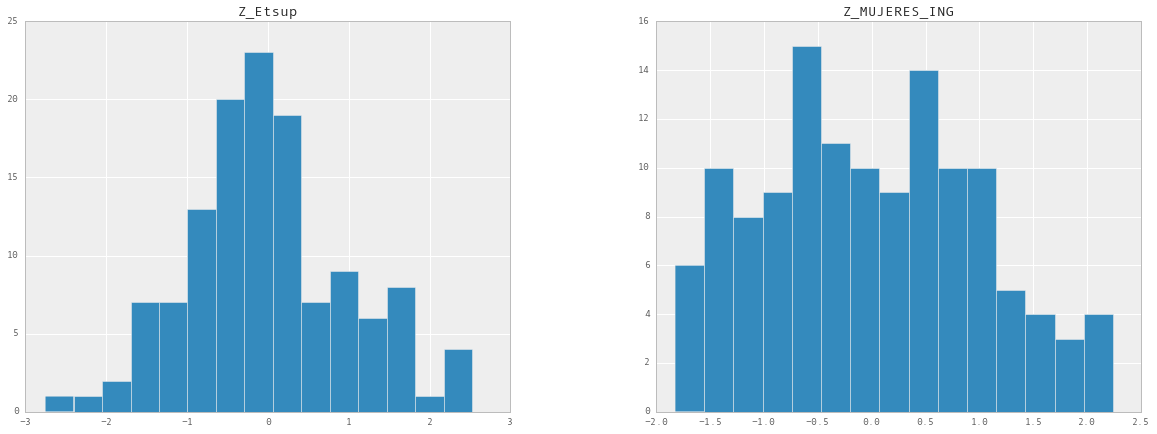

In [23]:
#Histogramas de las variables o columnas normalizadas.
Tabla[['Z_MUJERES_ING','Z_Etsup']].hist(bins=15)

Las gráficas anteriores muestran que las distribuciones son ["asimétricas"](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica). Se visualiza que son en mayoría "cargadas" hacia la izquierda, es decir tienen más valores negativos. 

Haciendo una comparación de como se comportan las variables con respecto a cada estado, la gráfica siguiente muestra la relación. Cada estado tienen solo las 4 mediciones de los 4 ciclos escolares, así que considero la media como el valor de la longitud de la barra sin ningún razón en especial, solo con el fin de explorar las dos variables.

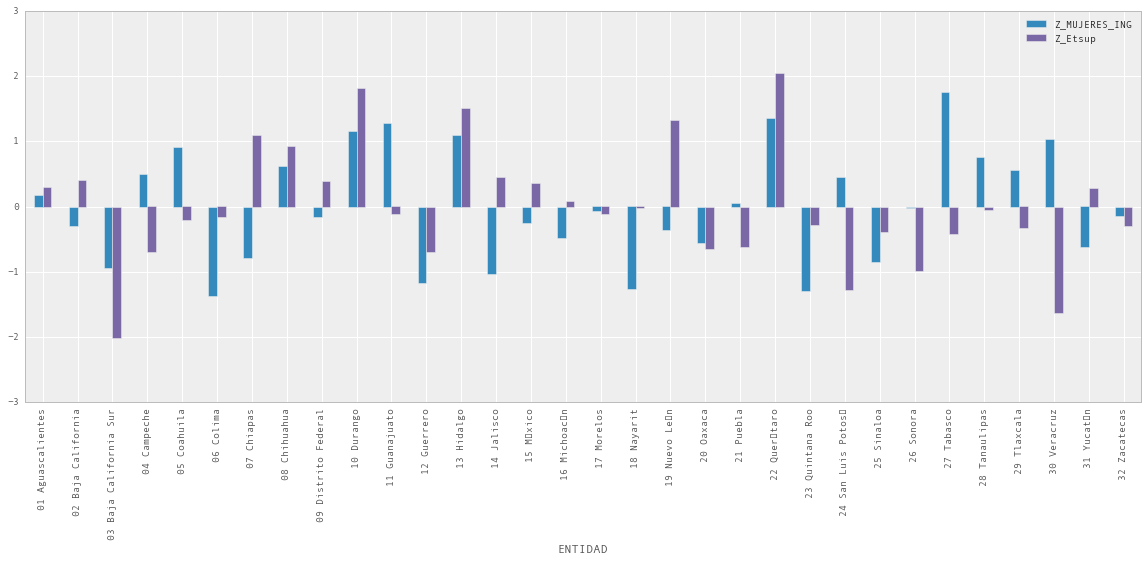

In [26]:
#Gráfica de barras para comparar las dos variables por estado o entidad federativa.
Tabla.groupby('ENTIDAD')[['Z_MUJERES_ING','Z_Etsup']].mean().plot(kind='bar')

Inicialmente esperaba que las dos barras por cada estado tuvieran valor positivo o negativo, pero no hay una razón real detras de mi supuesto inicial. Uno de los problemas es que se normalizan todos los datos sin importar el  ciclo, esto afecta en la "escala" pero no en la "forma", lo intensante sería normalizar los 32 registros de cada ciclo para ver como se comportan por cada ciclo. Como ejemplo reviso el comportamiento del ciclo 2010/2011.

In [28]:
Tabla_2010_2011=Tabla[Tabla.CICLO=='2010/2011']

In [40]:
Tabla_2010_2011['Z_Mujeres']=(Tabla_2010_2011.P_MUJERES_EN_ING - Tabla_2010_2011.P_MUJERES_EN_ING.mean())/(Tabla_2010_2011.P_MUJERES_EN_ING.std())

/home/dlegorreta/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
#Todos los registros del 2010/2011
Tabla_2010_2011.head(32)

,ENTIDAD,CICLO,P_MUJERES_EN_ING,Etsup,Z_MUJERES_ING,Z_Etsup,Z_Mujeres
0,01 Aguascalientes,2010/2011,10.915393,67.664326,1.369299,-0.316352,0.630278
1,02 Baja California,2010/2011,8.425156,78.516698,0.272798,0.575899,-0.583224
2,03 Baja California Sur,2010/2011,7.850094,55.770681,0.019587,-1.294212,-0.863454
3,04 Campeche,2010/2011,9.718582,64.187589,0.842320,-0.602199,0.047068
4,05 Coahuila,2010/2011,11.781447,74.427585,1.750640,0.239704,1.052310
5,06 Colima,2010/2011,5.437084,70.031689,-1.042909,-0.121714,-2.039323
6,07 Chiapas,2010/2011,7.511650,77.262467,-0.129436,0.472780,-1.028379
7,08 Chihuahua,2010/2011,11.624788,82.274927,1.681660,0.884889,0.975969
8,09 Distrito Federal,2010/2011,10.547888,75.424566,1.207479,0.321673,0.451191
9,10 Durango,2010/2011,11.334643,84.776164,1.553903,1.090534,0.834580


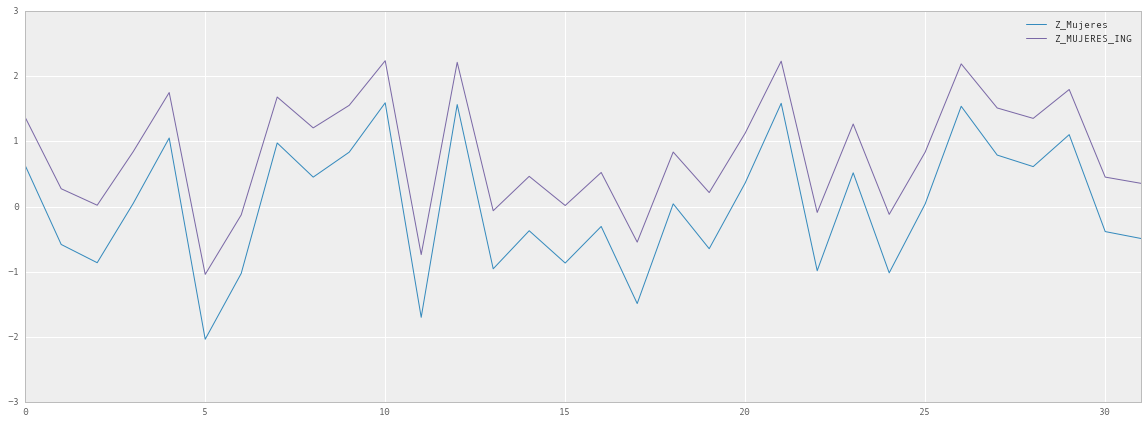

In [39]:
#Gráfica para visualizar que la modificación que se tiene al normalizar todos los datos o solo los correspondientes al ciclo
Tabla_2010_2011[['Z_Mujeres','Z_MUJERES_ING']].plot()

Dejando de lado el valor o relación de los porcentajes normalizados, se puede explorar como se comportó el porcentaje tanto de inscripción a ingeniería como de eficiencia por ciclo y estado. Se hace un mapa de calor para cada caso.

In [46]:
#Se cambia el tipo de dato de los valores del porcentaje, se agrega una nueva columna en el dataframe.
Tabla['E_Etsup']=Tabla.Etsup.apply(int)

In [44]:
#Se contruye una tabla pivot para pasarla al mapa de calor.
Tabla_1=Tabla.pivot(index='ENTIDAD',columns='CICLO',values='E_Etsup')

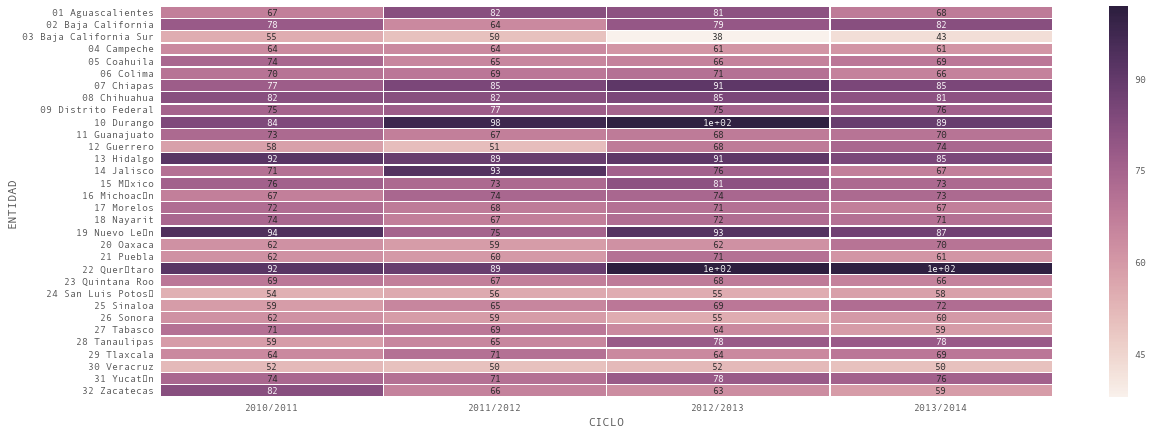

In [48]:
#Se usa la librería seaborn.
sns.heatmap(Tabla_1,annot=True,linewidths=.5)

Se observa que los estados con mejor eficiencia terminal en todos los ciclos son Durango y Querétaro.En cada ciclo hay 3 estados relevantes con casi el 100% de eficiencia.

In [49]:
#Valores enteros del porcentaje de mujeres en ingeniería
Tabla['E_MUJERES']=Tabla.P_MUJERES_EN_ING.apply(int)

In [50]:
#Se contruye la tabla
Tabla_2=Tabla.pivot(index='ENTIDAD',columns='CICLO',values='E_MUJERES')

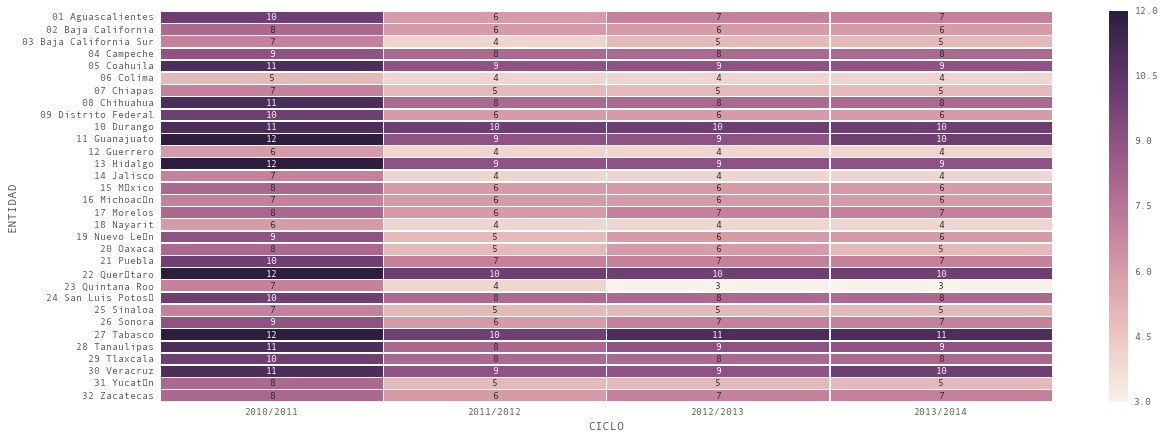

In [51]:
#Se contruye el mapa de calor.
sns.heatmap(Tabla_2,annot=True,linewidths=.5)

Se observa que en el periódo 2010/2011 los porcentajes fueron mayores con respecto a los periodos siguientes, se aprecia que Durango mantiene un porcentaje casi constante por cada ciclo y tabasto el más alto en los 4 ciclos revisados. Lo raro es que los porcentaje bajaran considerablemente del 2010/2011 al 2011/2012. Los últimos 3 periodos muestran un comportamiento más similar, lo cual puede ser interesante para revisar con mayor información.

Por último, se puede explorar la relación del porcentaje de inscripción de mujeres a ingeniería en los 4 periodos y se puede calcular la correlacion, esperando que las tasas registradas de un ciclo afectan al siguente ciclo.

In [52]:
Tabla_3=Tabla.pivot(index='ENTIDAD',columns='CICLO',values='P_MUJERES_EN_ING')

In [53]:
Tabla_3.corr()

CICLO,2010/2011,2011/2012,2012/2013,2013/2014
CICLO,,,,
2010/2011,1.000000,0.913931,0.918816,0.906410
2011/2012,0.913931,1.000000,0.993247,0.979626
2012/2013,0.918816,0.993247,1.000000,0.993226
2013/2014,0.906410,0.979626,0.993226,1.000000


Se observa de la matriz, que el ciclo 2010/2011 tiene mayor correlación con el ciclo 2011/2012 ( fila 3 , columna 3) un valor de 0.913, también el ciclo 2011/2012 tienen mucha correlacion con el 2012/2013 (fila 4 y columna 4) un valor de 0.993, y por último el ciclo 2012/2013 con el 2013/2014 ( fila 5, columna 5) con un valor de 0.993. Esto no implica que esto sea "cierto", solo muestra que hay una correlación alta no una causualidad.

Por último exploro cual puede ser la relación de los valores normalizados con respecto a los periódos. Para tener una imagen gráfica de la relación hago un scatter plot. 

In [54]:
#Tabla auxiliar para constuir el scatter plot
Tabla_2_1=Tabla[['CICLO','Z_MUJERES_ING','Z_Etsup']]

In [55]:
Tabla_2_1.head()

,CICLO,Z_MUJERES_ING,Z_Etsup
0,2010/2011,1.369299,-0.316352
1,2010/2011,0.272798,0.575899
2,2010/2011,0.019587,-1.294212
3,2010/2011,0.842320,-0.602199
4,2010/2011,1.750640,0.239704


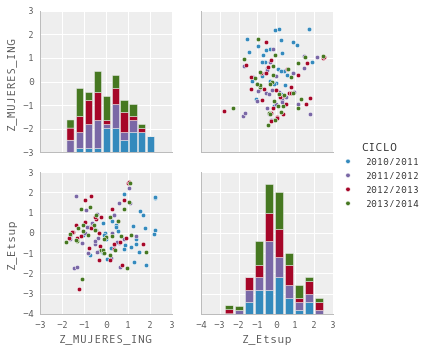

In [56]:
sns.pairplot(data=Tabla_2_1,hue="CICLO")

No se visualiza ningúna aglumeración con respecto a los año, ni alguna relación interesante, por lo menos con estos datos. Asi que uno puede suponer que con esta información la posible relación entre esas dos tasa o porcentajes es casi nula o inexistente. Pero esto esta sujeto a que se haga un análisis detallado y profundo, pero a primera imagen es complicado que la eficiencia escolar tenga algo que ver conque las mujeres decidas inscribirse a una carrera de ingeniería, creo que hay muchos otros factores que afectan la decisión de una mujeres por hacer una carrera de esa naturaleza.

**Comentarios**: La intención es mostrar como procesar los datos y tratar de explorar la información de las dos tablas, más que intentar hacer un "análisis fino" desde un punto de vista estadístico, trato de hacer ejemplos de como construir nuevas variables, como construir o elegir columnas, como hacer algunos gráficos y tratar de elabora un análisis exploratorio con algunos estadísticos básicos.